In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("stock_data.csv")
df['RET'] = pd.to_numeric(df['RET'], errors='coerce')
df['RETX'] = pd.to_numeric(df['RETX'], errors='coerce')
df['excess_ret'] = df['RET'] - df['sprtrn']
df['excess_ret_without_div'] = df['RETX'] - df['sprtrn']
df['No'] = df.index

payment_dates_df = df[['PERMNO', 'PAYDT']][df['PAYDT'].notna()]
new_df = pd.merge(payment_dates_df, df, how='left', left_on=['PERMNO', 'PAYDT'], right_on = ['PERMNO', 'date'])


indexes = df.index[df['No'].isin(new_df['No'])]

event_counts = len(indexes)
entries = len(df.index)
ex_ret_sum = np.zeros(41)
excess_ret_without_div_sum = np.zeros(41)
for ind in indexes:
    if ind >= 20 and ind <= entries - 21:
        ex_ret = df['excess_ret'].iloc[(ind - 20):(ind + 21)].fillna(0).to_numpy()
        ex_ret_sum = ex_ret_sum + ex_ret
        
        ex_ret_divi = df['excess_ret_without_div'].iloc[(ind - 20):(ind + 21)].fillna(0).to_numpy()
        excess_ret_without_div_sum = excess_ret_without_div_sum + ex_ret_divi

mean_ex_by_date = ex_ret_sum/event_counts 
mean_ex_div_by_date = excess_ret_without_div_sum/event_counts 

/Users/charlesliu/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (3,4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.date

0           2010/01/04
1           2010/01/05
2           2010/01/06
3           2010/01/07
4           2010/01/08
               ...    
17774856    2019/12/24
17774857    2019/12/26
17774858    2019/12/27
17774859    2019/12/30
17774860    2019/12/31
Name: date, Length: 17774861, dtype: object

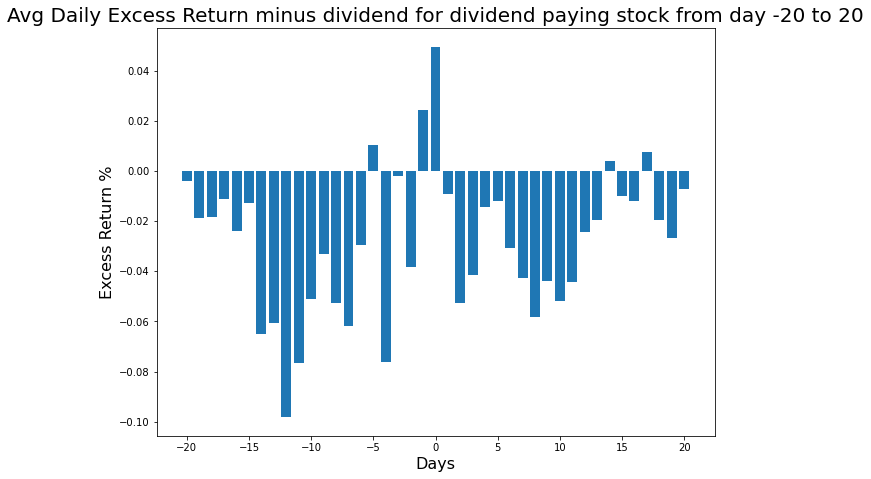

In [13]:
plt.figure(figsize=(10,7.5))
plt.bar(np.arange(-20, 21, 1), mean_ex_div_by_date * 100)
plt.xlabel("Days", fontsize=16)
plt.ylabel("Excess Return %", fontsize=16)
plt.title("Avg Daily Excess Return minus dividend for dividend paying stock from day -20 to 20", fontsize=20)
plt.show()

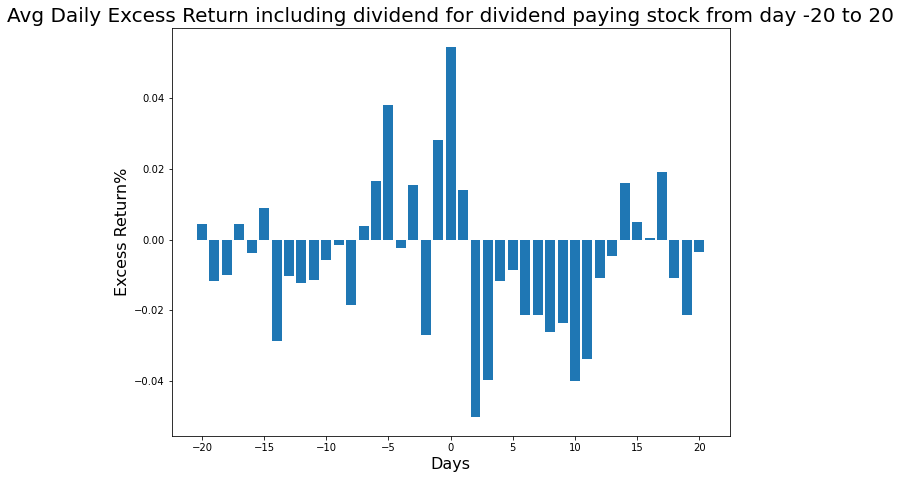

In [12]:
plt.figure(figsize=(10,7.5))
plt.bar(np.arange(-20, 21, 1), mean_ex_by_date * 100)
plt.xlabel("Days", fontsize=16)
plt.ylabel("Excess Return%", fontsize=16)
plt.title("Avg Daily Excess Return including dividend for dividend paying stock from day -20 to 20", fontsize=20)
plt.show()

In [11]:
mean_ex_by_date_series = pd.Series(mean_ex_by_date * 100)
mean_ex_by_date_series.describe()

count    41.000000
mean     -0.005911
std       0.021106
min      -0.050310
25%      -0.021218
50%      -0.008629
75%       0.004454
max       0.054638
dtype: float64

In [13]:
mean_ex_div_by_date_series = pd.Series(mean_ex_div_by_date * 100)
mean_ex_div_by_date_series.describe()

count    41.000000
mean     -0.028286
std       0.029077
min      -0.098159
25%      -0.051082
50%      -0.024268
75%      -0.011014
max       0.049518
dtype: float64